<a href="https://colab.research.google.com/github/thaistelesr/modelo_regressao_populacao_pinguins/blob/main/An%C3%A1lise_popula%C3%A7%C3%A3o_pinguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fazendo a leitura inicial dos dados e exploração suas informações iniciais. Apresentando ainda uma análise inicial das medidas de dispersão de seus atributos.

In [ ]:
# Carregando Bibliotecas Python
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
#Carregando os dados
dados = pd.read_csv('penguins.csv')

In [ ]:
#Apresentação inicial dos dados
dados

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
#Data frame sobre pinguins formado por 344 linhas e 7 colunas
dados.shape

(344, 7)

In [ ]:
#Verificando os tipos de informações disponíveis: possui dados do tipo float e string
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
#Verificando valores nulos em cada uma das colunas
print(dados.isnull().sum())

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [ ]:
#Exploração dos dados nulos no dataframe
dados[dados.isna().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [ ]:
#Excluindo dados nulos
dados.dropna(axis=0, inplace=True)
print(dados.isnull().sum())

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [ ]:
#Verificando se o dataframe possui dados duplicados:
dados.duplicated().any()

False

In [ ]:
#análise inicial das medidas de dispersão de seus atributos:
dados.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,333.0,44.0,5.0,32.0,40.0,44.0,49.0,60.0
culmen_depth_mm,333.0,17.0,2.0,13.0,16.0,17.0,19.0,22.0
flipper_length_mm,333.0,201.0,14.0,172.0,190.0,197.0,213.0,231.0
body_mass_g,333.0,4207.0,805.0,2700.0,3550.0,4050.0,4775.0,6300.0


#### Exercício 2:  Imprima as matrizes de covariância e de correlação do `dataframe` e avalie as relações entre os atributos.

<AxesSubplot:>

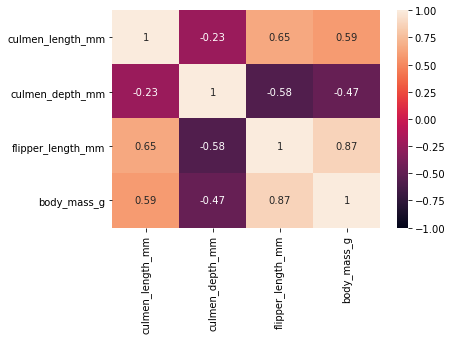

In [ ]:
#Imprimindo a matriz de correlação
dados.corr()
sns.heatmap(dados.corr(), annot = True, vmin=-1, vmax=1)

In [ ]:
#Imprimindo a matriz de correlação
dados.cov()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.906333,-2.462091,50.058195,2595.623304
culmen_depth_mm,-2.462091,3.877888,-15.947248,-748.456122
flipper_length_mm,50.058195,-15.947248,196.441677,9852.191649
body_mass_g,2595.623304,-748.456122,9852.191649,648372.487699


#### Exercício 3: Gere gráficos de boxplots para todos os elementos numéricos do dataframe.

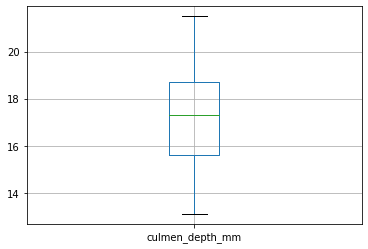

In [ ]:
dados.boxplot(column=['culmen_depth_mm'])
plt.show()

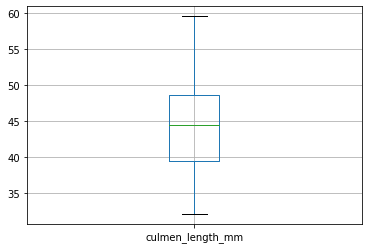

In [ ]:
dados.boxplot(column=['culmen_length_mm'])
plt.show()

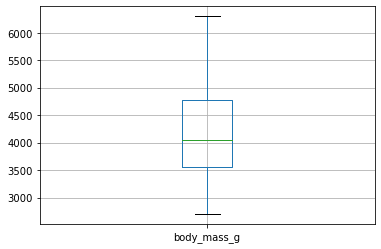

In [ ]:
dados.boxplot(column=['body_mass_g'])
plt.show()

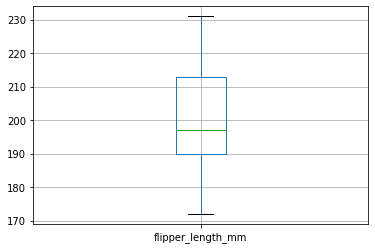

In [ ]:
dados.boxplot(column=['flipper_length_mm'])
plt.show()

#### Exercício 4: Plote um gráfico de dispersão entre as colunas `'body_mass_g'` e `'flipper_length_mm'`, de modo a observar a origem do animal e seu sexo. Discuta suas observações.

<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

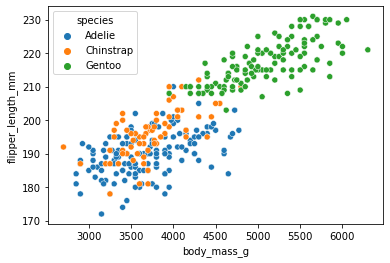

In [ ]:
#Tamanho da nadadeira como variável dependente, relacionada a origem, sexo e 'body_mass_g'
sns.scatterplot(x='body_mass_g', y='flipper_length_mm', data=dados, hue='species')

<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

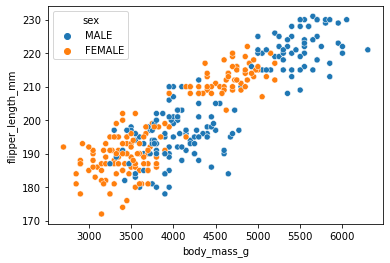

In [ ]:
sns.scatterplot(x='body_mass_g', y='flipper_length_mm', data=dados, hue='sex')

Text(0.5, 1.5, 'Dispersão entre as variáveis')

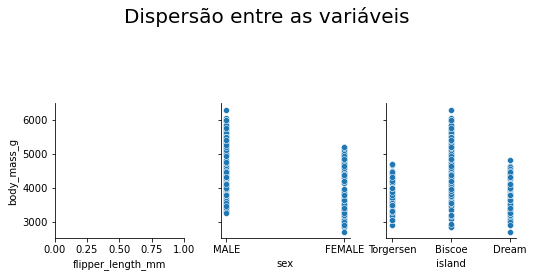

In [ ]:
#Peso como variável dependente, relacionada a origem, sexo e 'flipper_length_mm'
ax = sns.pairplot(dados, y_vars = 'body_mass_g', x_vars = ['flipper_length_mm','sex','island'])
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1.5)

#### Exercício 5: Carregue o dataframe `penguins` utilizando a função [`seaborn.load_dataset()`](https://seaborn.pydata.org/generated/seaborn.load_dataset.html), realize uma análise exploratória rápida e estude a relação entre os atributos `flipper_length_mm` e `body_mass_g`, para então propor um modelo de regressão linear simples para essa relação.

#### Plote novamente a dispersão entre `flipper_length_mm` e `body_mass_g`, juntamente com a curva de regressão e imprima os coeficientes calculados na tela.

In [ ]:
import seaborn as sns
from sklearn import linear_model

In [ ]:
# Carregando o dataframe penguins utilizando a função seaborn.load_dataset().
#É possível perceber o aparecimento de uma nova coluna, que não estava no dataframe anterior 'bill_leghth_mm'
dados_sns = sns.load_dataset('penguins')


In [ ]:
dados_sns.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
#Excluindo dados nulos
dados_sns.dropna(axis=0, inplace=True)
print(dados_sns.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [ ]:
#Verificando se o dataframe possui dados duplicados:
dados_sns.duplicated().any()

False

In [ ]:
#Análise inicial das medidas de dispersão:
dados_sns.describe().round()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.0,333.0,333.0,333.0
mean,44.0,17.0,201.0,4207.0
std,5.0,2.0,14.0,805.0
min,32.0,13.0,172.0,2700.0
25%,40.0,16.0,190.0,3550.0
50%,44.0,17.0,197.0,4050.0
75%,49.0,19.0,213.0,4775.0
max,60.0,22.0,231.0,6300.0


In [ ]:
#Preparando os dados para a curva de regressão
X=dados_sns['flipper_length_mm']
y=dados_sns['body_mass_g']

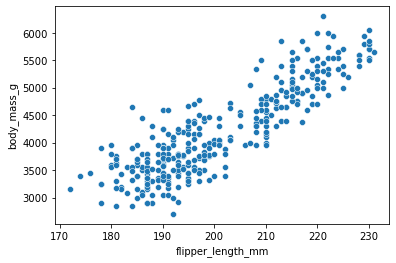

In [ ]:
#Curva de regressão entre as variáveis
ax = sns.scatterplot(x=X, y=y)

In [ ]:
#Calculando e imprimindo os coeficientes calculados na tela
from statsmodels.regression.linear_model import OLS

In [ ]:
res = OLS(y,X).fit()
coeffs_ols = res.params
print(f'coefficients : {coeffs_ols}')

coefficients : flipper_length_mm    21.075081
dtype: float64


In [ ]:
ols_preds= res.predict()

In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            body_mass_g   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                          1.869e+04
Date:                Sun, 27 Mar 2022   Prob (F-statistic):                   6.26e-294
Time:                        18:24:17   Log-Likelihood:                         -2583.2
No. Observations:                 333   AIC:                                      5168.
Df Residuals:                     332   BIC:                                      5172.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
flipper_length_mm    21.0751      0.154    136.712      0.000      20.772      21.378
==============================================================================
Omnibus:                       11.889   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.653
Skew:                           0.373   Prob(JB):                      0.00486
Kurtosis:                       2.541   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lr = LinearRegression()
modelo = lr.fit(dados_sns[['flipper_length_mm']],dados_sns[['body_mass_g']])

#### Exercício 6: Ainda considerando o dataset `penguins.csv` considere as seguintes combinações de múltiplos atributos:

- ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'sex'])
- ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm'])
- ['culmen_length_mm', 'culmen_depth_mm'])
- ['culmen_length_mm'])

#### e submeta os mesmos à regressão linear múltipla, comparando as métricas:

- MAE
- MSE
- RMSE
- R2

#### para cada combinação. Discuta os resultados.

In [ ]:
import scipy.stats

In [ ]:
#Considerando a target = flipper_length_mm
dados.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [ ]:
#1ª combinação
X1 = pd.get_dummies(dados[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'sex']])
y1 = dados[['body_mass_g']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=42)
modelo1 = LinearRegression()
modelo1.fit(X1_train, y1_train)
y1_predict = modelo1.predict(X1_test)

modelo1_mse = mean_squared_error(y1_test, y1_predict)
modelo1_mae = mean_absolute_error(y1_test, y1_predict)
modelo1_rmse =  np.sqrt(modelo1_mse)
modelo1_r2 = r2_score(y1_test, y1_predict)

print('MSE: ',modelo1_mse)
print('MAE: ',modelo1_mae)
print('RMSE: ',modelo1_rmse)
print('R2: ', modelo1_r2)

NameError: name 'train_test_split' is not defined

In [ ]:
# Combinação2
X2 = dados[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']]
y2 = dados[['body_mass_g']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=42)
modelo2 = LinearRegression()
modelo2.fit(X2_train, y2_train)
y2_predict = modelo2.predict(X2_test)

modelo2_mse = mean_squared_error(y2_test, y2_predict)
modelo2_mae = mean_absolute_error(y2_test, y2_predict)
modelo2_rmse =  np.sqrt(modelo2_mse)
modelo2_r2 = r2_score(y2_test, y2_predict)

print('MSE: ',modelo2_mse)
print('MAE: ',modelo2_mae)
print('RMSE: ',modelo2_rmse)
print('R2: ', modelo2_r2)

NameError: name 'train_test_split' is not defined